In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


###### Reading the Apple cleanead dataset file

In [48]:

apple_cleaned_df = pd.read_csv('/Users/surya/Library/CloudStorage/GoogleDrive-venkatasuryakirannaidu.vakkalagadda@sjsu.edu/My Drive/Projects/Stock Market Prediction/Apple-stock-Prediction/Apple Cleaned Data.csv')

In [49]:
apple_cleaned_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-01-02 00:00:00-05:00,40.226436,40.732339,40.013671,40.722881,102223600,0.0,0.0
1,2018-01-03 00:00:00-05:00,40.786712,41.264248,40.651963,40.715790,118071600,0.0,0.0
2,2018-01-04 00:00:00-05:00,40.789068,41.008925,40.680325,40.904907,89738400,0.0,0.0
3,2018-01-05 00:00:00-05:00,41.001832,41.458089,40.909635,41.370621,94640000,0.0,0.0
4,2018-01-08 00:00:00-05:00,41.216957,41.514824,41.117664,41.216957,82271200,0.0,0.0


In [50]:
apple_cleaned_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

###### Changing the column Date to index


In [53]:
apple_cleaned_df['Date'] = pd.to_datetime(apple_cleaned_df['Date'],utc = True)
apple_cleaned_df.set_index('Date',inplace=True)

In [54]:
apple_cleaned_df['MA5']= apple_cleaned_df['Close'].rolling(window=5).mean()
apple_cleaned_df['MA10']= apple_cleaned_df['Close'].rolling(window=10).mean()
apple_cleaned_df['MA25']= apple_cleaned_df['Close'].rolling(window=25).mean()
apple_cleaned_df['MA50']=apple_cleaned_df['Close'].rolling(window=50).mean()

In [55]:
apple_cleaned_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA5,MA10,MA25,MA50
Date,,,,,,,,,,,
2018-01-02 05:00:00+00:00,40.226436,40.732339,40.013671,40.722881,102223600,0.0,0.0,NaN,NaN,NaN,NaN
2018-01-03 05:00:00+00:00,40.786712,41.264248,40.651963,40.715790,118071600,0.0,0.0,NaN,NaN,NaN,NaN
2018-01-04 05:00:00+00:00,40.789068,41.008925,40.680325,40.904907,89738400,0.0,0.0,NaN,NaN,NaN,NaN
2018-01-05 05:00:00+00:00,41.001832,41.458089,40.909635,41.370621,94640000,0.0,0.0,NaN,NaN,NaN,NaN
2018-01-08 05:00:00+00:00,41.216957,41.514824,41.117664,41.216957,82271200,0.0,0.0,40.986231,NaN,NaN,NaN


###### Graph for stock price vs time period

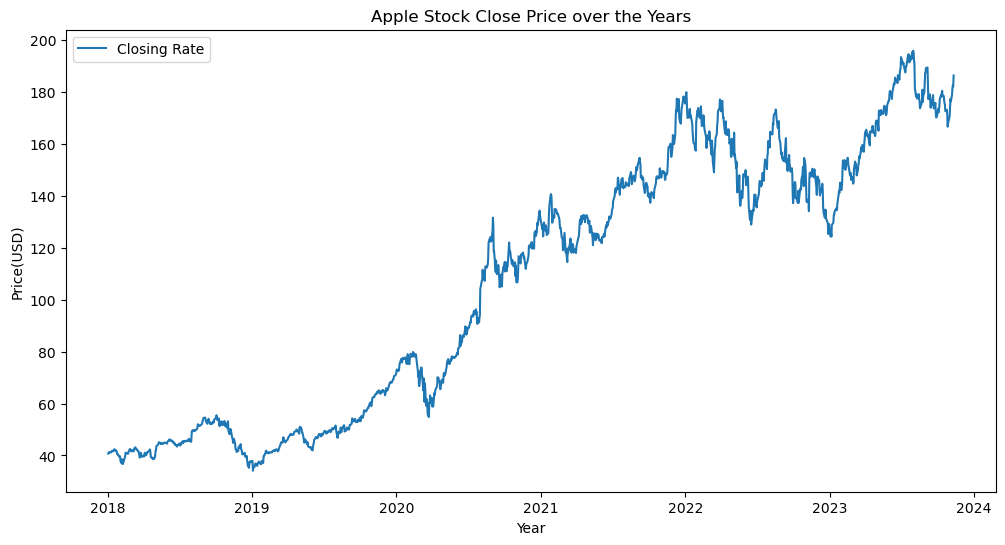

In [56]:
plt.figure(figsize=(12,6))
plt.plot(apple_cleaned_df['Close'],label = 'Closing Rate')
plt.title ('Apple Stock Close Price over the Years')
plt.xlabel('Year')
plt.ylabel('Price(USD)')
plt.legend()
plt.show()

###### Plotting Moving Averages

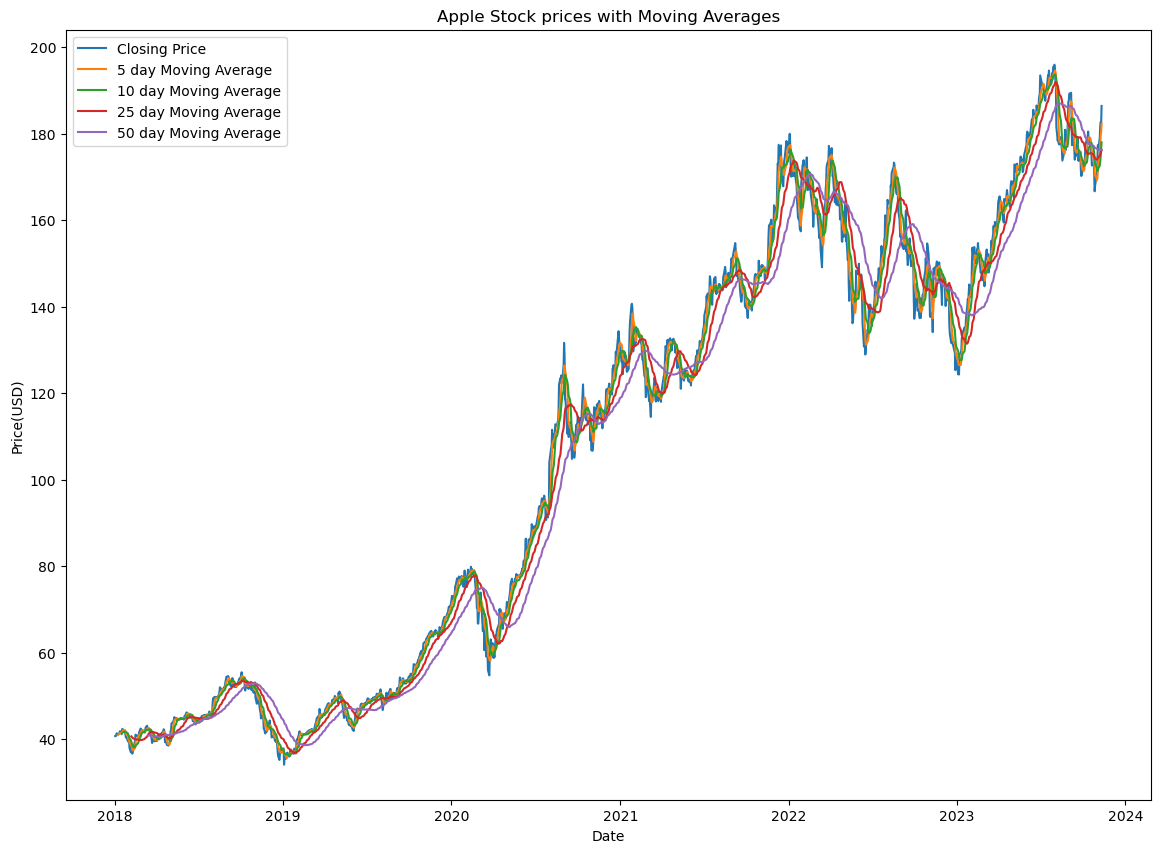

In [58]:
plt.figure(figsize=(14,10))
plt.plot(apple_cleaned_df['Close'], label = 'Closing Price')
plt.plot(apple_cleaned_df['MA5'],label = '5 day Moving Average')
plt.plot(apple_cleaned_df['MA10'],label = '10 day Moving Average')
plt.plot(apple_cleaned_df['MA25'],label = '25 day Moving Average')
plt.plot(apple_cleaned_df['MA50'],label = '50 day Moving Average')
plt.title('Apple Stock prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.legend()
plt.show()

###### Histogram For daily Return

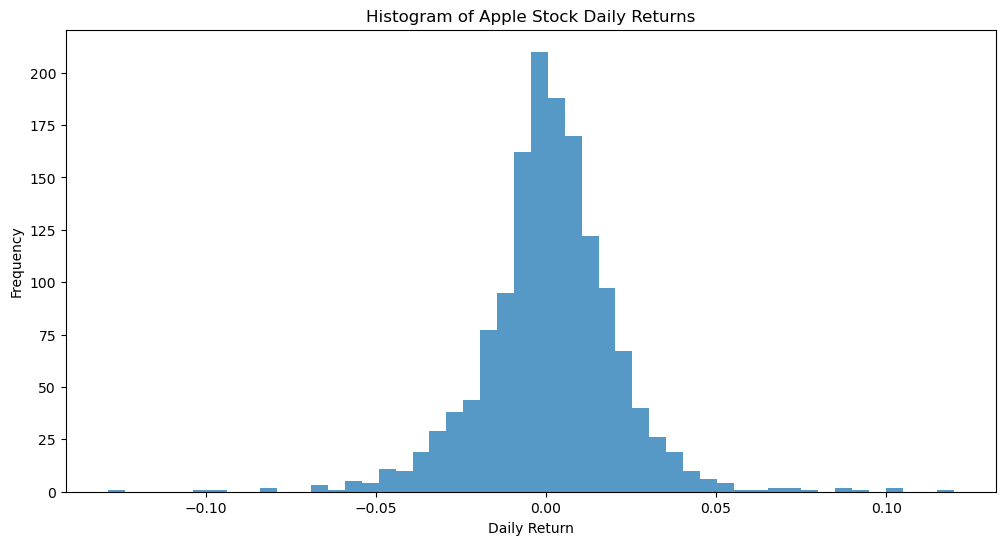

In [59]:
daily_returns = apple_cleaned_df['Close'].pct_change() 
plt.figure(figsize=(12, 6))
plt.hist(daily_returns, bins=50, alpha=0.75)
plt.title('Histogram of Apple Stock Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

###### Box Plot for closing prices

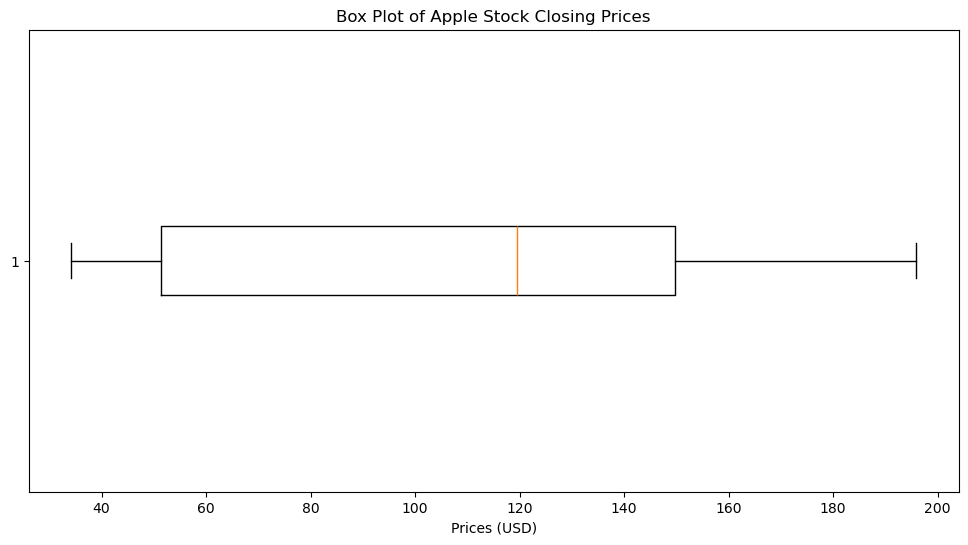

In [60]:
plt.figure(figsize=(12,6))
plt.boxplot(apple_cleaned_df['Close'], vert = False)
plt.title('Box Plot of Apple Stock Closing Prices')
plt.xlabel('Prices (USD)')
plt.show()